In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#dataset loading
dataset = pd.read_csv("C:/Users/avish/Desktop/Sem 8/Final Project/Heart_Disease_Prediction/CVD/data/heart.csv")

In [3]:
print("The shape of the data is: " ,dataset.shape)
dataset.head() #the first five rows of the dataset

The shape of the data is:  (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# get the descriptive statistics of the dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
print("The dataset has the following types of parameters\n",dataset.dtypes)

The dataset has the following types of parameters
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [6]:
#check for the missing values in the dataset
print("How many missing values are there in the dataset?\n",dataset.isnull().sum())

How many missing values are there in the dataset?
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Data Dictionary
# age in years
# sex 1-male, 0-female
# cp - chest pain 0,1,2,3
# trestbps - resting blood pressure in mm Hg
# chol - cholestrol in mg/dl
# fbs - fasting blood sugar > 120 mg/dl
            # 1 -true, 0 -false
# restecg - resting ECG 0,1,2
# thalach - maximum heart rate achieved 
# exang - exercise induced angina 1-yes, 0-no
# oldpeak - ST depression induced by exercise relative to rest
# slope - slope of the peak exercise ST segment 0,1,2
# ca - number of major vessels 0,1,2,3
# thal
            # 0 = error
            # 1 = fixed defect
            # 2 = normal
            # 3 = reversable defect
# target 0-no disease, 1-disease

In [8]:
# dropping the wrong ca vlaues and error values from thal
dataset = dataset[dataset['ca']<4]
dataset = dataset[dataset['thal']>0]
print(f'The length of the data row now is {len(dataset)} instead of 1025')

The length of the data row now is 1000 instead of 1025


In [9]:
 # renaming the feature names to full medical name 
dataset = dataset.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [10]:
print(dataset.dtypes)

age                            int64
sex                            int64
chest_pain_type                int64
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar            int64
resting_electrocardiogram      int64
max_heart_rate_achieved        int64
exercise_induced_angina        int64
st_depression                float64
st_slope                       int64
num_major_vessels              int64
thalassemia                    int64
target                         int64
dtype: object


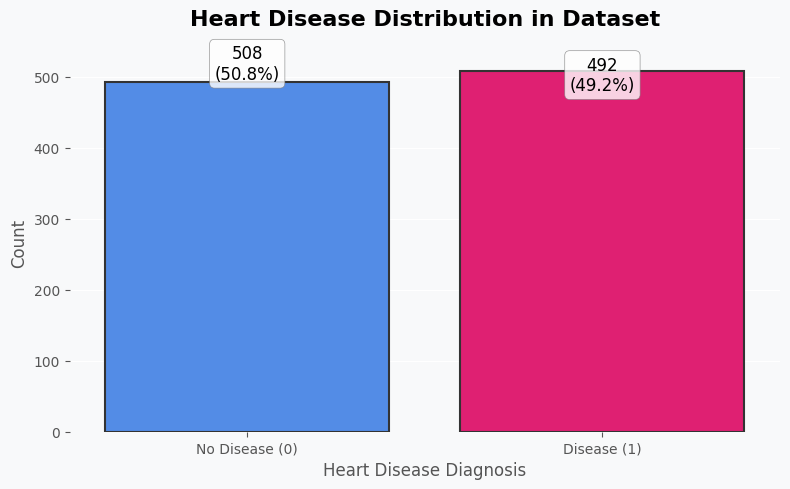

In [11]:
# target distribution

# Set custom style (compatible with all matplotlib versions)
plt.style.use('ggplot')  

# Custom settings
custom_palette = ['#3a86ff', '#ff006e']  
background_color = '#f8f9fa'  

# Create figure
plt.figure(figsize=(8, 5), facecolor=background_color, dpi=100)
ax = plt.gca()
ax.set_facecolor(background_color)

# Calculate statistics
total = len(dataset)
target_counts = dataset['target'].value_counts()
percentages = (target_counts/total)*100

# Create countplot 
sns.countplot(x='target', data=dataset, hue='target',  
              palette=custom_palette, 
              edgecolor='.2', 
              linewidth=1.5,
              legend=False)  

# Annotate bars
for i, (count, pct) in enumerate(zip(target_counts, percentages)):
    ax.text(i, count + 10, 
            f'{count}\n({pct:.1f}%)', 
            ha='center', 
            va='center',
            fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.3'))

# Customize plot
plt.title('Heart Disease Distribution in Dataset', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Heart Disease Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'])

# Remove spines and adjust layout
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [12]:
# categorizing data types
# Numerical Features (Continuous)
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 
             'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# Categorical (Binary) - Features with exactly 2 classes
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']  

# Categorical (Nominal) - Features with >2 non-ordinal classes
nom_feats = ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']

# Combined Categorical Features
cat_feats = nom_feats + bin_feats

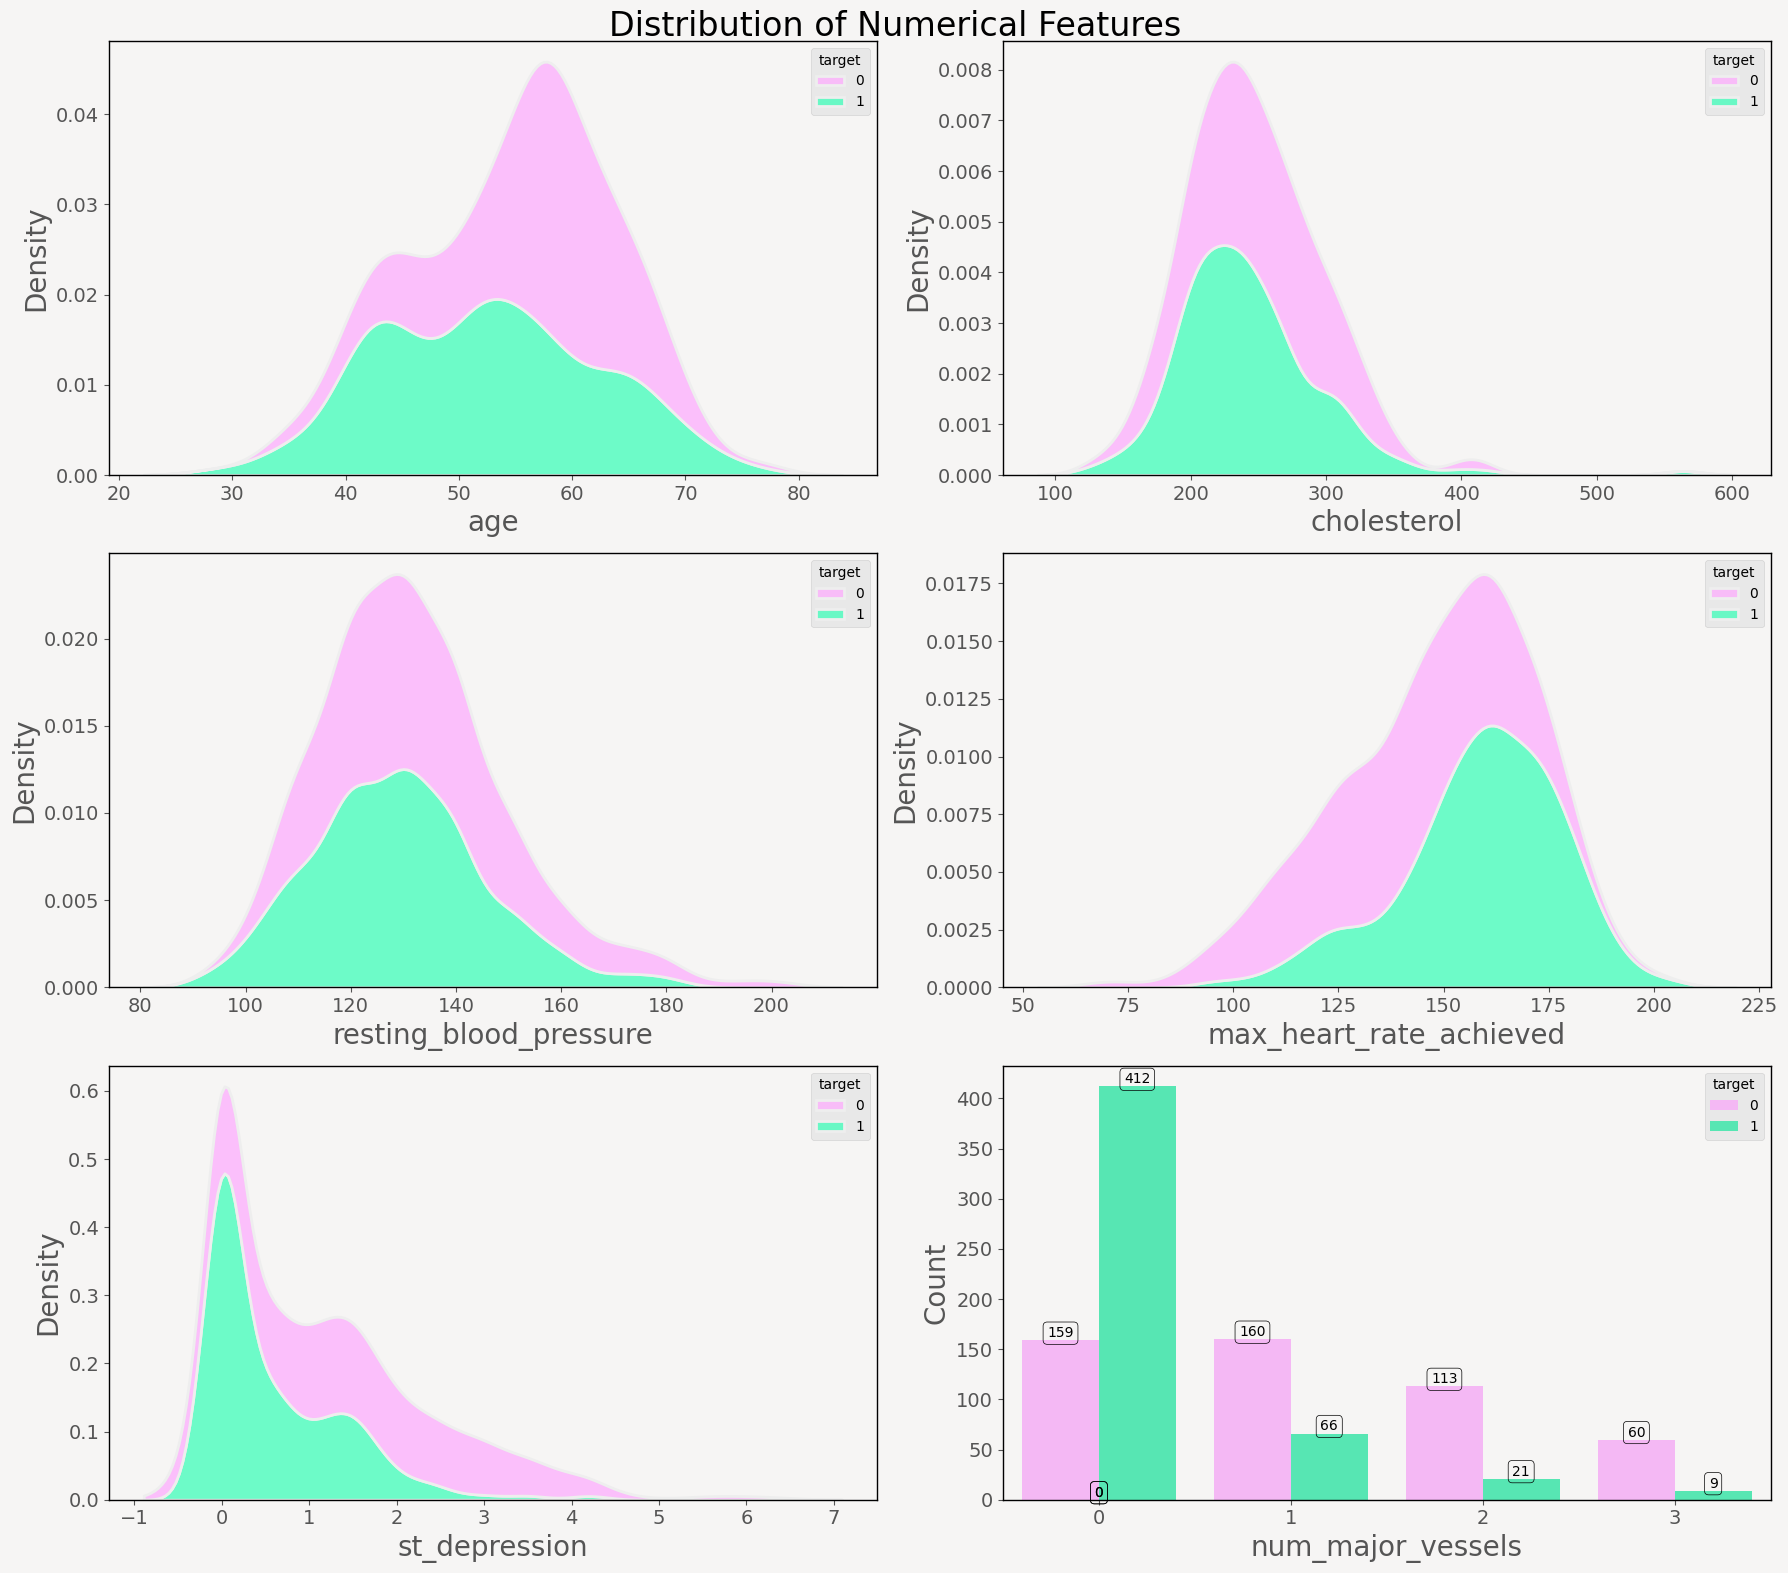

In [33]:
# density plots
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

# Numerical features (including num_major_vessels as requested)
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 
             'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# Setup subplots
L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L/ncol))
fig, axes = plt.subplots(nrow, ncol, figsize=(18, 16), facecolor=background_color)
fig.subplots_adjust(top=0.92)

# Plot each feature
for i, col in enumerate(num_feats):
    ax = axes.flatten()[i]
    ax.set_facecolor(background_color)
    
    if col == 'num_major_vessels':
        # Bar plot for vessel count
        sns.countplot(data=dataset, x=col, hue="target", palette=mypal[1::4], ax=ax)
        
        # Add count labels
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 3, 
                    '{:1.0f}'.format(height), ha="center",
                    bbox=dict(facecolor='none', edgecolor='black', 
                             boxstyle='round', linewidth=0.5))
    else:
        # KDE plot for continuous features
        sns.kdeplot(data=dataset, x=col, hue="target", 
                    multiple="stack", palette=mypal[1::4],
                    ax=ax, linewidth=2)
    
    # Consistent formatting
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("Density" if col != 'num_major_vessels' else "Count", fontsize=20)
    ax.tick_params(labelsize=14)
    
    # Borders as in original (no grid)
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

# Remove empty subplots if any
for j in range(i+1, nrow*ncol):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Distribution of Numerical Features', fontsize=24)
plt.tight_layout()
plt.show()

<Figure size 2400x2400 with 0 Axes>

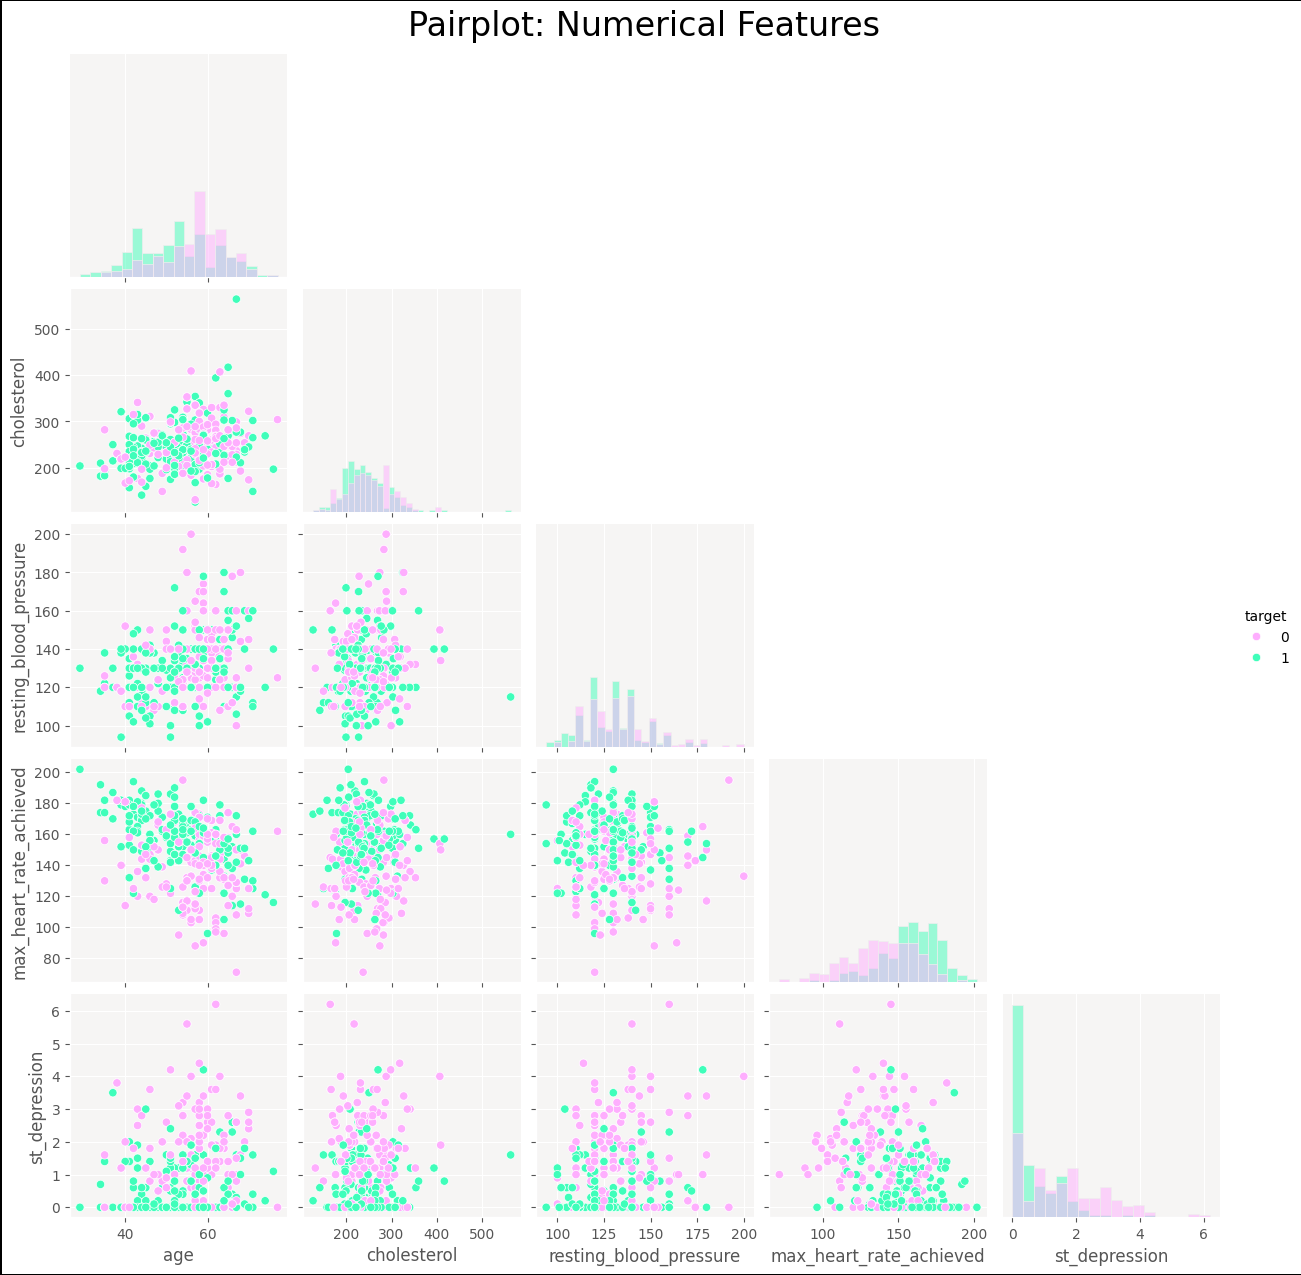

In [37]:
# pairplot numerical features
# Numerical features and target
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 
             'max_heart_rate_achieved', 'st_depression', 'target']

# Subset dataset
data = dataset[num_feats]

# Create pairplot
plt.figure(figsize=(24,24), facecolor=background_color)
g = sns.pairplot(data, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4])

# Set background color for each axis
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_facecolor(background_color)

# Add border around the entire figure
g.figure.patch.set_edgecolor('black')
g.figure.patch.set_linewidth(2)

# Set title
plt.suptitle('Pairplot: Numerical Features', fontsize=24, y=1.02)

# Save the plot
plt.show()

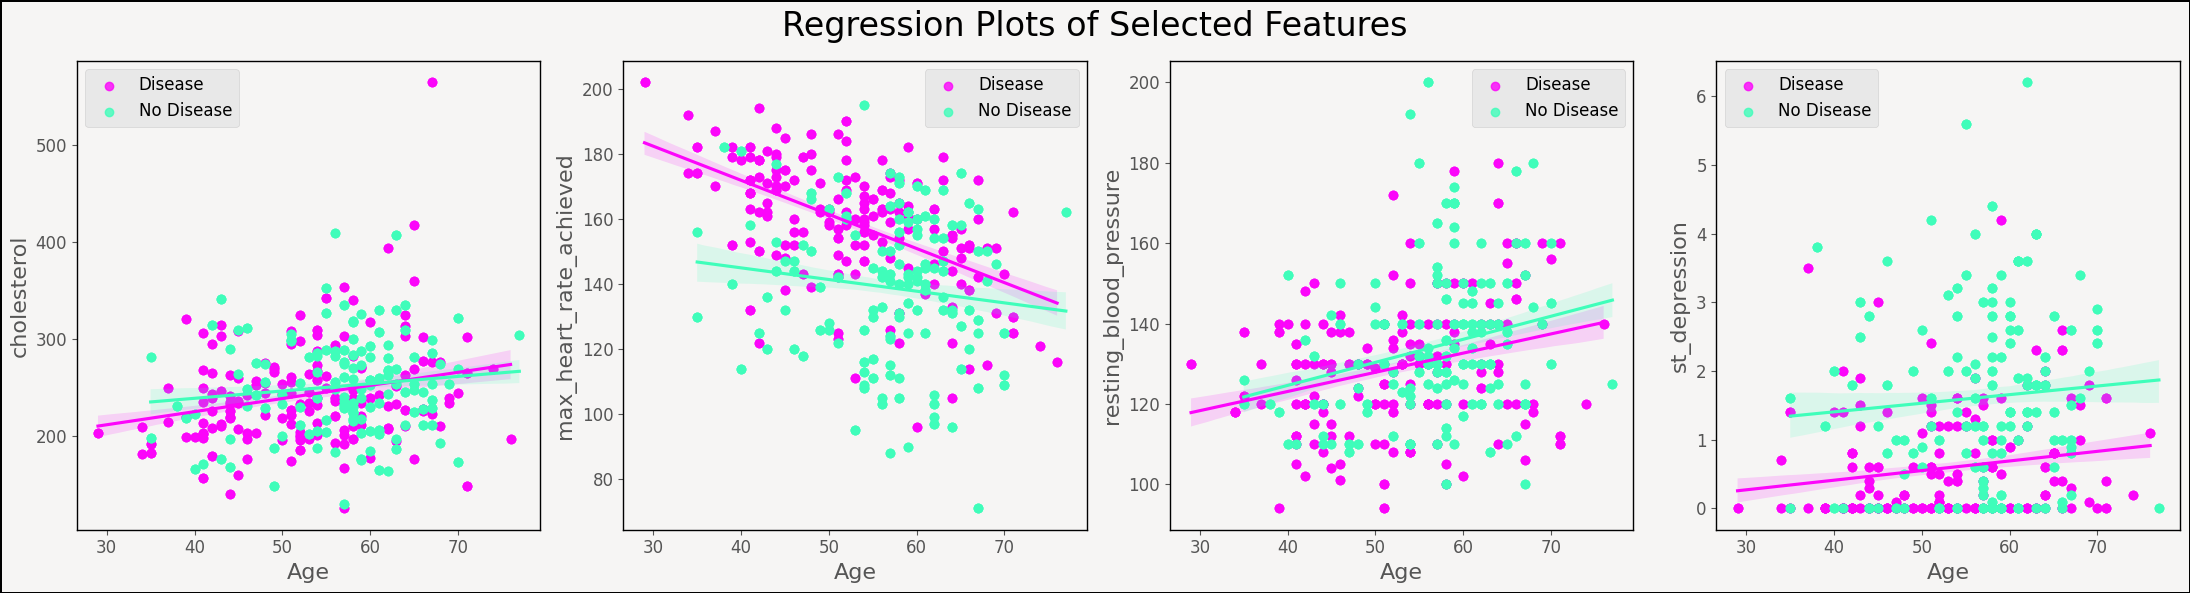

In [38]:
# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(22, 6), facecolor=background_color)

# Set background color for each axis
for a in ax:
    a.set_facecolor(background_color)

# Regression plots
sns.regplot(data=dataset[dataset['target'] == 1], x='age', y='cholesterol', ax=ax[0], color=mypal[0], label='Disease')
sns.regplot(data=dataset[dataset['target'] == 0], x='age', y='cholesterol', ax=ax[0], color=mypal[5], label='No Disease')
sns.regplot(data=dataset[dataset['target'] == 1], x='age', y='max_heart_rate_achieved', ax=ax[1], color=mypal[0], label='Disease')
sns.regplot(data=dataset[dataset['target'] == 0], x='age', y='max_heart_rate_achieved', ax=ax[1], color=mypal[5], label='No Disease')
sns.regplot(data=dataset[dataset['target'] == 1], x='age', y='resting_blood_pressure', ax=ax[2], color=mypal[0], label='Disease')
sns.regplot(data=dataset[dataset['target'] == 0], x='age', y='resting_blood_pressure', ax=ax[2], color=mypal[5], label='No Disease')
sns.regplot(data=dataset[dataset['target'] == 1], x='age', y='st_depression', ax=ax[3], color=mypal[0], label='Disease')
sns.regplot(data=dataset[dataset['target'] == 0], x='age', y='st_depression', ax=ax[3], color=mypal[5], label='No Disease')

# Formatting
for a in ax:
    a.set_xlabel('Age', fontsize=16)
    a.set_ylabel(a.get_ylabel(), fontsize=16)
    a.tick_params(labelsize=12)
    a.legend(fontsize=12)
    a.grid(False)
    for spine in a.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

# Add border around the entire figure
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(2)

# Set title
plt.suptitle('Regression Plots of Selected Features', fontsize=24)

# Save the plot
plt.tight_layout()
plt.show()